In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
import math as m
import sympy as smp
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data = {}
columns = {}
experiments = []
            
data, columns, experiments = ll.read_standard_layout()

Рассчитаем рабочее давление для каждого эксперимента и отмасштабируем измерения напряжения.

In [3]:
for e in experiments:
    disp("Computing P, scaled U for %s" % e)

    ll.compute(name = "P",
               expr = lambda P_atm, P_m: P_atm + (P_m/100) * 98066.5, # Pa/at
               data = data[e],
               columns = columns[e],
               debug = True)
    
    ll.add(data[e], ll.var(name = "U_0", value = columns[e].U[0], error = columns[e].Error_U[0]))
    
    ll.compute(name = "U_scaled",
               expr = lambda U, U_0: U / U_0,
               data = data[e],
               columns = columns[e],
               debug = True)
    
    ll.compute(name = "ln_U",
               expr = lambda U_scaled: ll.log(U_scaled),
               data = data[e],
               columns = columns[e],
               debug = True)

'Computing P, scaled U for 40'

'Error influence estimations for P:'

,Error,Derivative,(E*D)^2
P_atm,100,1,10000.0000000000
P_m,0.5,980.665000000000,240425.960556250


'Error influence estimations for U_scaled:'

,Error,Derivative,(E*D)^2
U,None,59.8802395209581,3585.64308508731*Error_U**2
U_0,0.0001,-3585.64308508731*U,0.128568363336344*U**2


'Error influence estimations for ln_U:'

,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


'Computing P, scaled U for 100'

'Error influence estimations for P:'

,Error,Derivative,(E*D)^2
P_atm,100,1,10000.0000000000
P_m,1,980.665000000000,961703.842225000


'Error influence estimations for U_scaled:'

,Error,Derivative,(E*D)^2
U,None,69.4444444444444,4822.53086419753*Error_U**2
U_0,0.0001,-4822.53086419753*U,0.232568039361378*U**2


'Error influence estimations for ln_U:'

,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


'Computing P, scaled U for 200'

'Error influence estimations for P:'

,Error,Derivative,(E*D)^2
P_atm,100,1,10000.0000000000
P_m,0.5,980.665000000000,240425.960556250


'Error influence estimations for U_scaled:'

,Error,Derivative,(E*D)^2
U,None,147.058823529412,21626.2975778547*Error_U**2
U_0,0.0001,-21626.2975778547*U,4.67696746925923*U**2


'Error influence estimations for ln_U:'

,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


'Computing P, scaled U for 300'

'Error influence estimations for P:'

,Error,Derivative,(E*D)^2
P_atm,100,1,10000.0000000000
P_m,0.5,980.665000000000,240425.960556250


'Error influence estimations for U_scaled:'

,Error,Derivative,(E*D)^2
U,None,0.00392156862745098,1.53787004998078e-5*Error_U**2
U_0,0.1,-1.53787004998078e-5*U,2.36504429062788e-12*U**2


'Error influence estimations for ln_U:'

,Error,Derivative,(E*D)^2
U_scaled,None,1/U_scaled,Error_U_scaled**2/U_scaled**2


In [4]:
for e in experiments:
    disp("Experiment %s:" % e, data[e], columns[e])

'Experiment 40:'

,Value,Error,ErrorRel
P_atm,98600.00000,1.000000e+02,NaN
L_to_S,700.00000,5.000000e+01,NaN
V_1,0.00036,5.000000e-07,NaN
V_2,0.00036,5.000000e-07,NaN
P_m,-93.50000,5.000000e-01,NaN
P,6907.82250,5.004258e+02,0.072443
U_0,0.01670,1.000000e-04,0.005988


,t,Error_t,U,Error_U,U_scaled,Error_U_scaled,ln_U,Error_ln_U
0,0,1,0.0167,0.0001,1.000000,0.008468,2.363643e-125,0.008468
1,22,1,0.0150,0.0001,0.898204,0.008049,-1.073585e-01,0.008961
2,41,1,0.0135,0.0001,0.808383,0.007700,-2.127190e-01,0.009525
3,49,1,0.0130,0.0001,0.778443,0.007588,-2.504594e-01,0.009748
4,79,1,0.0110,0.0001,0.658683,0.007170,-4.175134e-01,0.010886
5,96,1,0.0100,0.0001,0.598802,0.006979,-5.128236e-01,0.011656
6,116,1,0.0090,0.0001,0.538922,0.006802,-6.181841e-01,0.012622
7,137,1,0.0080,0.0001,0.479042,0.006640,-7.359672e-01,0.013860


'Experiment 100:'

,Value,Error,ErrorRel
P_atm,98600.00000,1.000000e+02,NaN
L_to_S,700.00000,5.000000e+01,NaN
V_1,0.00036,5.000000e-07,NaN
V_2,0.00036,5.000000e-07,NaN
P_m,-85.00000,1.000000e+00,NaN
P,15243.47500,9.857504e+02,0.064667
U_0,0.01440,1.000000e-04,0.006944


,t,Error_t,U,Error_U,U_scaled,Error_U_scaled,ln_U,Error_ln_U
0,0,1,0.0144,0.0001,1.000000,0.009821,2.363643e-125,0.009821
1,16,1,0.0140,0.0001,0.972222,0.009685,-2.817088e-02,0.009962
2,47,1,0.0130,0.0001,0.902778,0.009356,-1.022788e-01,0.010363
3,63,1,0.0125,0.0001,0.868056,0.009196,-1.414996e-01,0.010594
4,78,1,0.0120,0.0001,0.833333,0.009040,-1.823216e-01,0.010848
5,96,1,0.0115,0.0001,0.798611,0.008887,-2.248812e-01,0.011128
6,114,1,0.0110,0.0001,0.763889,0.008739,-2.693329e-01,0.011440
7,134,1,0.0105,0.0001,0.729167,0.008595,-3.158529e-01,0.011787
8,154,1,0.0100,0.0001,0.694444,0.008455,-3.646431e-01,0.012175
9,175,1,0.0095,0.0001,0.659722,0.008320,-4.159364e-01,0.012611


'Experiment 200:'

,Value,Error,ErrorRel
P_atm,98600.00000,1.000000e+02,NaN
L_to_S,700.00000,5.000000e+01,NaN
V_1,0.00036,5.000000e-07,NaN
V_2,0.00036,5.000000e-07,NaN
P_m,-75.50000,5.000000e-01,NaN
P,24559.79250,5.004258e+02,0.020376
U_0,0.00680,1.000000e-04,0.014706


,t,Error_t,U,Error_U,U_scaled,Error_U_scaled,ln_U,Error_ln_U
0,0,1,0.0068,0.0001,1.000000,0.020797,2.363643e-125,0.020797
1,24,1,0.0066,0.0001,0.970588,0.020494,-2.985296e-02,0.021115
2,44,1,0.0064,0.0001,0.941176,0.020195,-6.062462e-02,0.021457
3,62,1,0.0062,0.0001,0.911765,0.019901,-9.237332e-02,0.021827
4,82,1,0.0060,0.0001,0.882353,0.019612,-1.251631e-01,0.022227
5,103,1,0.0058,0.0001,0.852941,0.019329,-1.590647e-01,0.022661
6,180,1,0.0051,0.0001,0.750000,0.018382,-2.876821e-01,0.024510
7,208,1,0.0049,0.0001,0.720588,0.018126,-3.276874e-01,0.025155
8,232,1,0.0047,0.0001,0.691176,0.017877,-3.693601e-01,0.025864
9,259,1,0.0045,0.0001,0.661765,0.017634,-4.128452e-01,0.026648


'Experiment 300:'

,Value,Error,ErrorRel
P_atm,98600.00000,1.000000e+02,NaN
L_to_S,700.00000,5.000000e+01,NaN
V_1,0.00036,5.000000e-07,NaN
V_2,0.00036,5.000000e-07,NaN
P_m,-63.50000,5.000000e-01,NaN
P,36327.77250,5.004258e+02,0.013775
U_0,255.00000,1.000000e-01,0.000392


,t,Error_t,U,Error_U,U_scaled,Error_U_scaled,ln_U,Error_ln_U
0,0.00,0.005,255.0,0.1,1.000000,0.000555,2.363643e-125,0.000555
1,32.43,0.005,245.6,0.1,0.963137,0.000544,-3.755935e-02,0.000565
2,64.86,0.005,235.1,0.1,0.921961,0.000533,-8.125259e-02,0.000579
3,97.29,0.005,226.0,0.1,0.886275,0.000524,-1.207285e-01,0.000591
4,129.71,0.005,217.0,0.1,0.850980,0.000515,-1.613662e-01,0.000605
5,162.14,0.005,208.0,0.1,0.815686,0.000506,-2.037255e-01,0.000620
6,194.57,0.005,201.0,0.1,0.788235,0.000499,-2.379586e-01,0.000633
7,227.00,0.005,193.0,0.1,0.756863,0.000492,-2.785734e-01,0.000650
8,259.43,0.005,186.0,0.1,0.729412,0.000485,-3.155169e-01,0.000665
9,291.86,0.005,179.1,0.1,0.702353,0.000479,-3.533192e-01,0.000682


[None, None, None, 0]

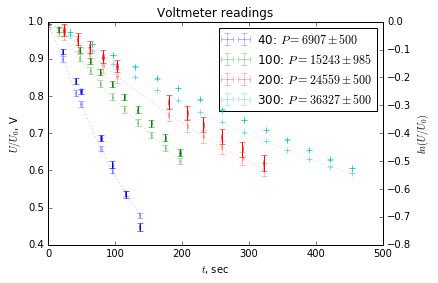

In [5]:
plt.title("Voltmeter readings")
plt.xlabel("$t$, sec")

ax1 = plt.gca()
ax1.set_ylabel("$U / U_0$, V")
ax2 = ax1.twinx()
ax2.set_ylabel("$ln(U / U_0)$")

for e in experiments:
    ax1.errorbar(x = columns[e].t,
                 y = columns[e].U_scaled,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_U_scaled,
                 label = "%s: $P = %d \pm %d$" % (e, data[e].Value["P"], data[e].Error["P"]),
                 alpha = 0.5,
                 linewidth = 0.5,
                 linestyle = "dotted")
    ax2.errorbar(x = columns[e].t,
                 y = columns[e].ln_U,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_ln_U,
                 linestyle = "none")

ax1.legend(loc = "best")
plt.axis([0, None, None, None])
ax1.axis([None, None, None, 1])
ax2.axis([None, None, None, 0])

Initial guesses for lnU:
                   Value     Error  ErrorRel
tau          185.697563  2.981299  0.016055
offset_lnU0    0.006857  0.005918  0.863135


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,185.517339,1.468974,0.007918
offset_lnU0,0.007147,0.003025,0.423304


Initial guesses for lnU:
                   Value     Error  ErrorRel
tau          414.476221  9.579931  0.023113
offset_lnU0    0.006979  0.005889  0.843833


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,414.435241,3.079643,0.007431
offset_lnU0,0.006999,0.001901,0.271585


Initial guesses for lnU:
                   Value      Error  ErrorRel
tau          623.366671  25.728297  0.041273
offset_lnU0    0.005684   0.010912  1.919745


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,623.366350,3.922187,0.006292
offset_lnU0,0.005684,0.001664,0.292810


Initial guesses for lnU:
                   Value     Error  ErrorRel
tau          854.326038  0.879023  0.001029
offset_lnU0   -0.006303  0.000291 -0.046231


'Final guesses for lnU:'

,Value,Error,ErrorRel
tau,854.326465,8.138295,0.009526
offset_lnU0,-0.006303,0.002698,-0.428017


[0, None, None, 0.1]

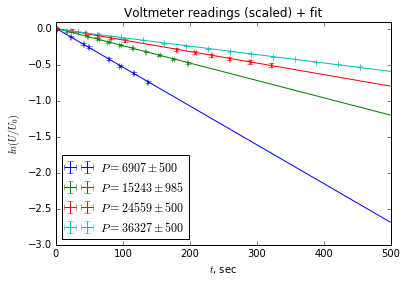

In [6]:
plt.title("Voltmeter readings (scaled) + fit")
plt.xlabel("$t$, sec")
plt.ylabel("$ln(U/U_0)$")

for e in experiments:
    plt.errorbar(x = columns[e].t,
                 y = columns[e].ln_U,
                 xerr = columns[e].Error_t,
                 yerr = columns[e].Error_ln_U,
                 linestyle = "none",
                 label = "$P = %d \pm %d$" % (data[e].Value["P"], data[e].Error["P"]))

plt.gca().set_prop_cycle(None)
t_linspace = ll.linspace([t for t in columns[e].t for e in experiments])

for e in experiments:
    model = ll.fit2(name = "lnU",
                    model = lambda t, tau, offset_lnU0: offset_lnU0 - t/tau,
                    x = columns[e].t,
                    y = columns[e].ln_U,
                    xerr = columns[e].Error_t,
                    yerr = columns[e].Error_ln_U,
                    data = data[e])

    plt.errorbar(x = t_linspace,
                 y = model(t_linspace))

plt.legend(loc = "best")
plt.axis([0, None, None, 0.1])

Initial guesses for D:
       Value     Error  ErrorRel
k  4.410460  0.368736  0.083605
l  0.000024  0.000017  0.690666


'Final guesses for D:'

,Value,Error,ErrorRel
k,4.388309,0.153688,0.035022
l,0.000025,0.000006,0.248089


'D for atmospheric pressure:'

,Value,Error,ErrorRel
D_atm,0.00007,4.513812e-08,0.000649


<Container object of 3 artists>

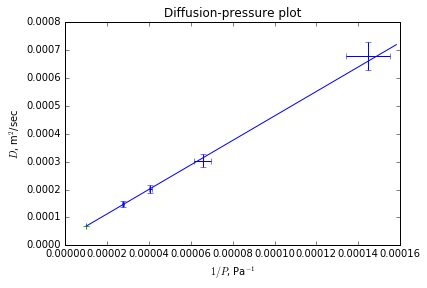

In [7]:
for e in experiments:
    ll.compute(name = "1/P",
               expr = lambda P: 1 / P,
               data = data[e],
               columns = columns[e])

    ll.compute(name = "D",
               expr = lambda V_1, V_2, L_to_S, tau: (V_1*V_2) / (V_1+V_2) * L_to_S / tau,
               data = data[e],
               columns = columns[e])

model = ll.fit2(name = "D",
                model = lambda _1_P, k, l: _1_P * k + l,
                x = [data[e].Value["1/P"] for e in experiments],
                y = [data[e].Value["D"] for e in experiments],
                xerr = [data[e].Error["1/P"] for e in experiments],
                yerr = [data[e].Error["D"] for e in experiments],
                data = data["global"])

ll.compute(name = "1/P_atm",
           expr = lambda P_atm: 1/P_atm,
           data = data["global"])

ll.compute(name = "D_atm",
           expr = lambda P_atm: model(1/P_atm),
           data = data["global"])

plt.title("Diffusion-pressure plot")
plt.xlabel("$1 / P$, Pa$^{-1}$")
plt.ylabel("$D$, m$^2$/sec")

plt.errorbar(x = [data[e].Value["1/P"] for e in experiments],
             y = [data[e].Value["D"] for e in experiments],
             xerr = [data[e].Error["1/P"] for e in experiments],
             yerr = [data[e].Error["D"] for e in experiments],
             linestyle = "none",
             ms = 2)

plt.errorbar(x = [data["global"].Value["1/P_atm"]],
             y = [data["global"].Value["D_atm"]],
             xerr = [data["global"].Error["1/P_atm"]],
             yerr = [data["global"].Error["D_atm"]],
             linestyle = "none",
             ms = 2)

plt.gca().set_prop_cycle(None)
_1_P_linspace = ll.linspace([data[e].Value["1/P"] for e in experiments] + [1 / data["global"].Value["P_atm"]])

disp("D for atmospheric pressure:", data["global"].loc[["D_atm"]])

plt.errorbar(x = _1_P_linspace,
             y = model(_1_P_linspace))